![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Princípios do Reconhecimento Facial</font>


#1° Problema de Negócio 
Precisamos Criar um detector de Face. Para isso nós Vamos fazer o Seguinte:

1. Entender como os dados são Processados
2. Reduzir a Dimensionalidade dos Dados
3. Criar a Máquina com SVM (classifier)
4. Usar o GrisSearch para escolher os Melhores Hyperparâmetros do SVM

Simbóra?

![alt text](https://www.computerid.com.br/imagens/loading.gif)

![alt text](https://www.sine.co/wp-content/uploads/2019/05/face_check_gif_520-2.gif)

##### **Transformação da imagem bidimensional num vetor**
* Assuma-se uma determinada imagem facial I(x,y) num espaço bidimensional N×N. Essa imagem pode ser encarada como um vector de dimensão N2. 

* Nesse caso uma imagem com 256×256 pixéis passa a ser considerada um vector de dimensão 65536, ou então um ponto num espaço com 65536 dimensões. 

* Como resultado, um conjunto de imagens pode mapear um grupo de pontos neste espaço gigantesco.

 ##### **Aplicação do PCA para reduzir a Dimensionalidade**
 * Cada face é decomposta numa série de componentes principais, ou vectores próprios da matriz covariância, definidos por um conjunto de faces de referência. 
  
 * Basicamente, cada face pode ser representada como a combinação linear de diversas Eigenfaces.

 * Eigenfaces é o nome dado a um conjunto de vetores próprios quando usado no problema de visão computacional do reconhecimento de rosto humano.

 * Esta técnica foi desenvolvida por Sirovich e Kirby (1987) com o objectivo de representar, de forma eficiente, imagens de faces através da análise de componentes principais (PCA - Principal Component Analysis). 

 * As imagens originais tinham  250 x 250 pixels, porém foi realizado o redimensionamento para 62 x 47.

 * Há um total de 13.233 imagens e 5749 pessoas no banco de dados, ou seja, tem pessoas que tem mais de uma imagem, como por exemplo o G.W.Bush.

#2° Análise Exploratória dos Dados

In [ ]:
# Reconhecimento de face
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
# Labeled Faces in the Wild (LFW) dataset.
fetch_lfw_people

#3° Pré-Processamento dos Dados

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[]),
  xlabel=faces.target_names[faces.target[i]]  

#4° Máquina Preditiva Detectora de Face

In [ ]:
# Importação de Bibliotecas
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline



In [ ]:
# Criação da Máquina Preditiva com SVC e PCA
pca = PCA(n_components=150, whiten=True, random_state=7)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# Separação dos Dados de Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data ,faces.target, test_size=0.3, random_state = 7) 

In [ ]:
# Tunning de Hyperparâmetro
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
              
grid = GridSearchCV(model,param_grid)

In [ ]:
#Cálculo dos Melhores hyperparâmetros
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
#Visualizando o resultado do Tunning
grid.best_estimator_

In [ ]:
#Treinando a Máquina Preditiva
model= grid.best_estimator_
yfit = model.predict(X_test)

In [ ]:
# Resultado do Treinamento
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62,47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='blue' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Nomes Preditos Incorretamente em Vermelho', size=14);

#5° Avaliação da Máquina Preditiva

In [ ]:
#Avaliação da Máquina Preditiva com o Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.62      0.72        29
     Colin Powell       0.83      0.87      0.85        78
  Donald Rumsfeld       0.79      0.79      0.79        39
    George W Bush       0.90      0.81      0.85       157
Gerhard Schroeder       0.57      0.72      0.64        29
      Hugo Chavez       0.77      0.81      0.79        21
Junichiro Koizumi       0.79      0.92      0.85        12
       Tony Blair       0.71      0.88      0.79        40

         accuracy                           0.81       405
        macro avg       0.78      0.80      0.78       405
     weighted avg       0.82      0.81      0.81       405



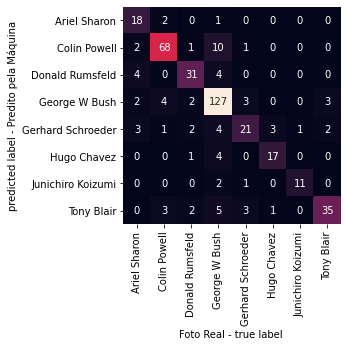

In [ ]:
#Avaliação da Máquina Preditiva com a Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True , annot=True , fmt='d' ,  cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Foto Real - true label ')
plt.ylabel('predicted label - Predito pela Máquina');


In [ ]:
#Avaliação da Máquina Preditiva com o Accuray Score
from sklearn.metrics import accuracy_score
resultado = accuracy_score(y_test,yfit)
resultado

0.8098765432098766

# Resumão



* Você Aprendeu como os dados de Imagem são Processados para utilização em Machine Learning

* Aprendeu a usar o PCA para reduzir a dimensionalidade dos dados

* Entendeu como o SVM trabalha na separação de dados não lineares

* Aprendeu a Tunnar os Hyperparâmetros dos algoritmos com o GridSearch

# Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/Z0vDDKXzAhA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Links Úteis

http://www.sinfic.pt/SinficWeb/displayconteudo.do2?numero=44666#:~:text=Esta%20t%C3%A9cnica%20foi%20desenvolvida%20por,combina%C3%A7%C3%A3o%20linear%20de%20diversas%20Eigenfaces.

https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-download-auto-examples-applications-plot-face-recognition-py